# Задание 1

In [21]:
a = 22695477

b = 1

m = 2**32

In [47]:
def RAND(a, b, m, x_i):
    return (a*x_i + b) % m

In [48]:
def RAND_python(a, b, m, x_i):
    import random
    random.seed(x_i)
    return random.random()

In [56]:
def print_divider():
    print('------------------------')

# Задание 2

In [79]:
x0 = 1.0
A = 0
B = 10
N = 10 ** 2

def generate_random_numbers(N: int, integers: bool = False):
    RNumsArr = list()
    RNumsArr.append(RAND(a, b, m, x0))

    RParamsArr = list()

    for i in range(N-1):
        RNumsArr.append(RAND(a, b, m, RNumsArr[-1]))

    if integers:
        return RNumsArr

    for i in range(N): 
        RNumsArr[i] = RNumsArr[i] / m

        RParamsArr.append( A + (B - A) * RNumsArr[i] )
    
    return RParamsArr

def generate_random_numbers_python(N:int):
    RParamsArr = list()
    RParamsArr.append(RAND_python(a, b, m, x0))

    for i in range(N-1):
        RParamsArr.append(RAND_python(a, b, m, RParamsArr[-1]) * (B - A))
    return RParamsArr

print('Custom generator')
for n in range(2, 6):
    N = 10 ** n
    RParamsArr = generate_random_numbers(N)

    print(f'N = {N}\n\n{RParamsArr[:3]}\n')
    print(f'min: {min(RParamsArr)}')
    print(f'max: {max(RParamsArr)}')
    print('--------------------------')

print()
print('Built-in python generator')
for n in range(2, 6):
    N = 10 ** n
    RParamsArr = generate_random_numbers_python(N)

    print(f'N = {N}\n\n{RParamsArr[:3]}\n')
    print(f'min: {min(RParamsArr)}')
    print(f'max: {max(RParamsArr)}')
    print('--------------------------')

Custom generator
N = 100

[0.05284202750772238, 5.019934882875532, 6.675799321383238]

min: 0.012337379157543182
max: 9.972152116242796
--------------------------
N = 1000

[0.05284202750772238, 5.019934882875532, 6.675799321383238]

min: 0.012337379157543182
max: 9.994865208864212
--------------------------
N = 10000

[0.05284202750772238, 5.019934882875532, 6.675799321383238]

min: 0.0006797537207603455
max: 9.999512247741222
--------------------------
N = 100000

[0.05284202750772238, 5.019934882875532, 6.675799321383238]

min: 0.00021725893020629883
max: 9.999896697700024
--------------------------

Built-in python generator
N = 100

[0.13436424411240122, 9.047842888975781, 4.71751232466263]

min: 0.13436424411240122
max: 9.784135904953887
--------------------------
N = 1000

[0.13436424411240122, 9.047842888975781, 4.71751232466263]

min: 0.058393570440725684
max: 9.999494837561082
--------------------------
N = 10000

[0.13436424411240122, 9.047842888975781, 4.71751232466263]

mi

# Задание 3

In [54]:
M = (A + B) / 2
M

5.0

In [55]:
D = (B - A) ** 2 / 12
D

8.333333333333334

In [27]:
def calculate_error(nums: list[int]):
    M_e2 = sum(RParamsArr) / N
    D_e2 = (sum(list(map(lambda x: x ** 2, RParamsArr))) / N - M_e2 ** 2 ) * (N / (N-1))

    EpsM = abs((M - M_e2) / M) * 100
    EpsD = abs((D - D_e2) / D) * 100

    print(f'N = {len(nums)}')
    print(f'M_e2 = {M_e2}')
    print(f'D_e2 = {D_e2}')
    print(f'EpsM = {EpsM}')
    print(f'EpsD = {EpsD}')

In [91]:
print('Custom generator')
print_divider()
for n in range(2, 6):
    N = 10 ** n
    RParamsArr = generate_random_numbers(N)

    calculate_error(RParamsArr)
    print('----------------------------')

Custom generator
------------------------
N = 100
M_e2 = 4.765576192643493
D_e2 = 9.605326142216686
EpsM = 4.688476147130132
EpsD = 15.263913706600226
----------------------------
N = 1000
M_e2 = 4.857646257919259
D_e2 = 8.469974893750537
EpsM = 2.847074841614816
EpsD = 1.6396987250064399
----------------------------
N = 10000
M_e2 = 4.962775821193354
D_e2 = 8.425318520171631
EpsM = 0.7444835761329216
EpsD = 1.1038222420595645
----------------------------
N = 100000
M_e2 = 5.008114353395719
D_e2 = 8.279912514907835
EpsM = 0.1622870679143773
EpsD = 0.6410498211059873
----------------------------


In [92]:
print('Built-in python generator')
print_divider()
for n in range(2, 6):
    N = 10 ** n
    RParamsArr = generate_random_numbers_python(N)
    calculate_error(RParamsArr)
    print_divider()

Built-in python generator
------------------------
N = 100
M_e2 = 5.009911041077395
D_e2 = 9.32169693152612
EpsM = 0.198220821547892
EpsD = 11.860363178313428
------------------------
N = 1000
M_e2 = 5.191692399987987
D_e2 = 8.574545387203624
EpsM = 3.833847999759747
EpsD = 2.894544646443485
------------------------
N = 10000
M_e2 = 5.000817211640271
D_e2 = 8.472100802526857
EpsM = 0.016344232805423076
EpsD = 1.6652096303222734
------------------------
N = 100000
M_e2 = 4.997062679981586
D_e2 = 8.351258985695775
EpsM = 0.05874640036827473
EpsD = 0.21510782834929643
------------------------


# Задание 4

In [84]:
def find_period_optimized(n: int, nums: list[int] = None):
    period = 0
    first_pos = 1
    second_pos = 2

    x_0 = 1.0

    unique = dict()

    current_rand = x_0
    current_seed = x_0

    for i in range(n):
        if current_rand in unique.keys():
            return i - unique[current_rand], unique[current_rand], i
        else:
            unique[current_rand] = i
            current_seed = RAND(a, b, m, current_seed)
            current_rand = current_seed / m
            current_rand = current_rand * 10
        
        
    return -1, -1, -1

def find_period(nums: list[int]):
    period = 0
    first_pos = 1
    second_pos = 2



    unique = dict()

    current_rand = nums[0]

    for i in range(1, len(nums)):
        if current_rand in unique.keys():
            return i - unique[current_rand], unique[current_rand], i
        else:
            unique[current_rand] = i
            current_rand = nums[i]


    return -1, -1, -1


In [89]:
# for n in range(2, 6):
#     N = 10 ** n

#     period, first_pos, second_pos = find_period_optimized(N)

#     print(f'N = {N}')
#     print(f'period = {period}')
#     print(f'first_pos = {first_pos}')
#     print(f'second_pos = {second_pos}')
#     print('------------------------')

print('Custom generator')
print_divider()
for n in range(2, 6):
    N = 10 ** n

    nums = generate_random_numbers(N)
    period, first_pos, second_pos = find_period(nums)

    print(f'N = {N}')
    print(f'period = {period}')
    print(f'first_pos = {first_pos}')
    print(f'second_pos = {second_pos}')
    print('------------------------')

Custom generator
------------------------
N = 100
period = -1
first_pos = -1
second_pos = -1
------------------------
N = 1000
period = -1
first_pos = -1
second_pos = -1
------------------------
N = 10000
period = -1
first_pos = -1
second_pos = -1
------------------------
N = 100000
period = 44789
first_pos = 17291
second_pos = 62080
------------------------


In [90]:
print('Built-in python generator')
print_divider()
for n in range(2, 6):
    N = 10 ** n

    nums = generate_random_numbers_python(N)
    period, first_pos, second_pos = find_period(nums)

    print(f'N = {N}')
    print(f'period = {period}')
    print(f'first_pos = {first_pos}')
    print(f'second_pos = {second_pos}')
    print('------------------------')

Built-in python generator
------------------------
N = 100
period = -1
first_pos = -1
second_pos = -1
------------------------
N = 1000
period = -1
first_pos = -1
second_pos = -1
------------------------
N = 10000
period = -1
first_pos = -1
second_pos = -1
------------------------
N = 100000
period = -1
first_pos = -1
second_pos = -1
------------------------


# Задание 5

In [31]:
from math import floor
def GetFreqDistr(nums, A, B, IntervalsCount):
    dY = (B - A) / IntervalsCount

    Freq = dict()
    for i in range(IntervalsCount):
        Freq[i] = 0

    for j in range(len(nums)):
        Yc = nums[j]
        fN = floor(Yc/dY)
        Freq[fN] = Freq[fN] + 1

    for i in range(IntervalsCount):
        Freq[i] = Freq[i] / (len(nums) * dY)

    return Freq

# Задание 6

In [100]:
def calculate_Pearson(resY, N, K):
    # return sum(list(map(lambda x: ((N/K) - x * N) ** 2 , resY.values()  ) )) * K / N

    # return sum(
    #     list(map(lambda x: (N * (1 / K) - (x * N)) ** 2 / (N * (1 / K)), resY.values()))
    # )

    return sum([(N/K - resY[i]*N)**2 * K/N for i in range(K)])

def pearson_(resY, N, K):
    target_distribution = [1/K for i in range(K)]

    return sum([(x-y)**2 / ])



In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

N = 100
Критерий Пирсона: 15.6
Хи-квадрат: 0.9242807368313661
----------------
N = 1000
Критерий Пирсона: 7.6000000000000005
Хи-квадрат: 0.4250965761355446
----------------
N = 10000
Критерий Пирсона: 7.164
Хи-квадрат: 0.37995083313681133
----------------
N = 100000
Критерий Пирсона: 23.9326
Хи-квадрат: 0.9955908496205416
----------------


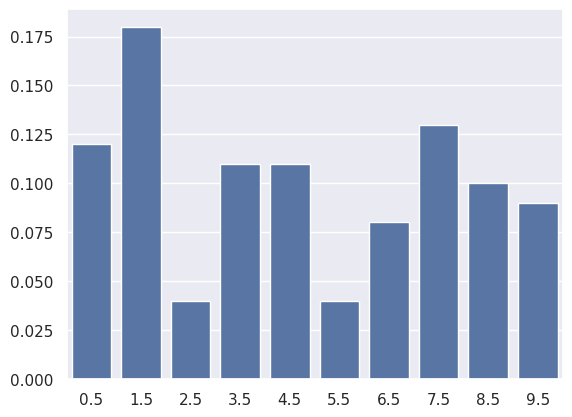

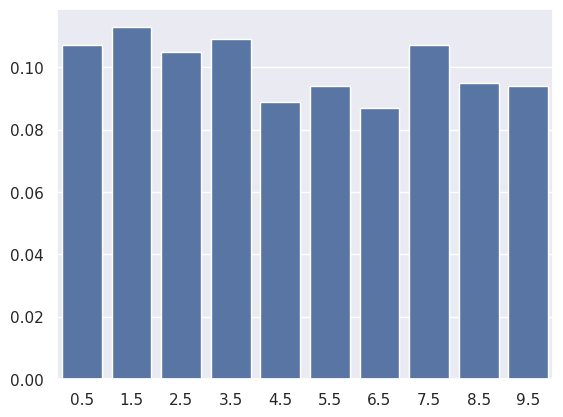

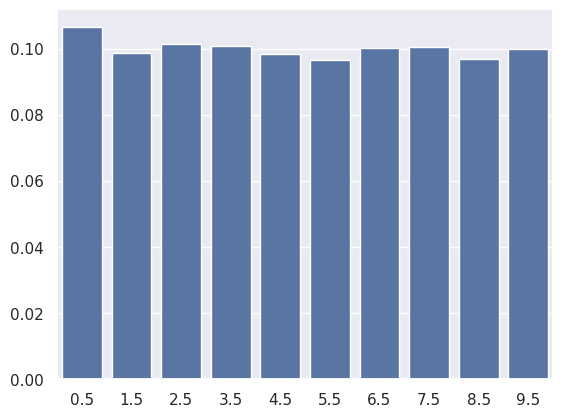

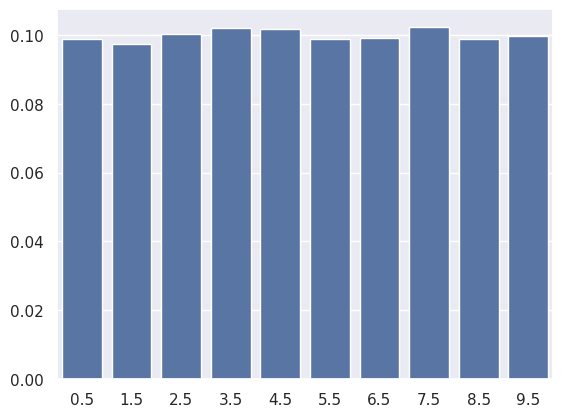

<Figure size 640x480 with 0 Axes>

In [102]:
K = 10
resX = dict()

import scipy.stats
import numpy as np

for k in range(K):
    resX[k] = (B-A)/K * (0.5 + k) 

for n in range(2, 6):
    N = 10 ** n
    RParamsArr = generate_random_numbers(N)
    resY = GetFreqDistr(RParamsArr, A, B, K)
    sns.barplot(x=resX, y = resY)
    plt.figure()

    pearson = calculate_Pearson(resY, N, K)

    # chisq = scipy.stats.chisquare(list(resY.values()), ddof=0).pvalue
    chisq = scipy.stats.chi2.cdf(pearson, K-1)
    
    print(f'N = {N}')
    print(f'Критерий Пирсона: {pearson}')
    print(f'Хи-квадрат: {chisq}')
    print('----------------')

N = 100
Критерий Пирсона: 7.800000000000001
Хи-квадрат: 0.4455795641271432
----------------
N = 1000
Критерий Пирсона: 9.78
Хи-квадрат: 0.6314125772771293
----------------
N = 10000
Критерий Пирсона: 9.358
Хи-квадрат: 0.595094817626599
----------------
N = 100000
Критерий Пирсона: 3.5696000000000003
Хи-квадрат: 0.06260559116252089
----------------


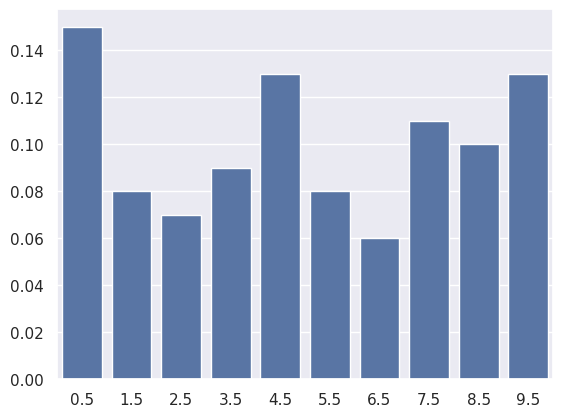

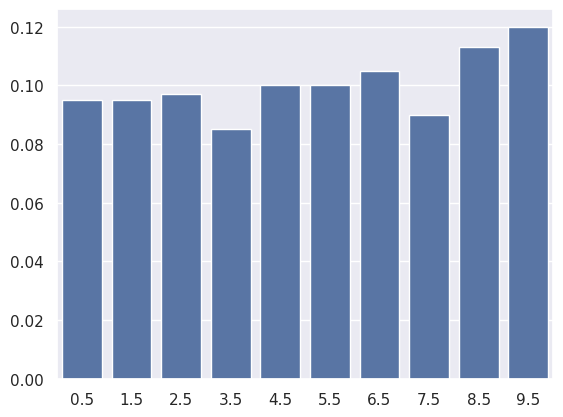

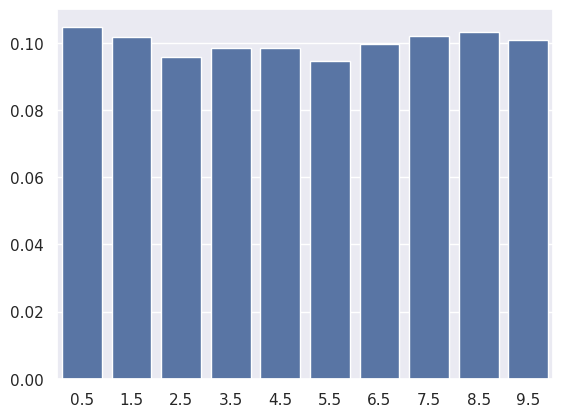

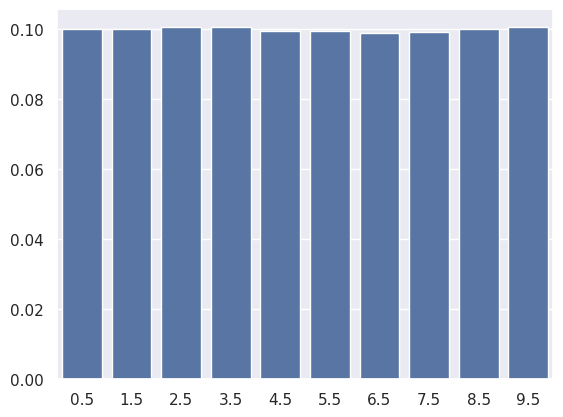

<Figure size 640x480 with 0 Axes>

In [93]:
for n in range(2, 6):
    N = 10 ** n
    RParamsArr = generate_random_numbers_python(N)
    resY = GetFreqDistr(RParamsArr, A, B, K)
    sns.barplot(x=resX, y = resY)
    plt.figure()

    pearson = calculate_Pearson(resY, N, K)

    # chisq = scipy.stats.chisquare(list(resY.values()), ddof=0).pvalue
    chisq = scipy.stats.chi2.cdf(pearson, K-1)
    
    print(f'N = {N}')
    print(f'Критерий Пирсона: {pearson}')
    print(f'Хи-квадрат: {chisq}')
    print('----------------')